In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Data Understanding

In [2]:
# Read the data file
credit = pd.read_csv("credit approval.csv")
credit

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [3]:
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [4]:
# Replace "?" with NaN
credit.replace('?', value = np.NaN, inplace = True)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
credit.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [7]:
# Convert Age to numeric
credit["Age"] = pd.to_numeric(credit["Age"])

In [8]:
#replace missing values with mean values of numeric columns
credit["Age"].fillna(credit["Age"].mean(), inplace=True)
credit["ZipCode"].fillna(credit["ZipCode"].mean(), inplace=True)

In [9]:
credit["Gender"]= credit["Gender"].fillna(credit["Gender"].mode().iloc[0])
credit["Married"] = credit["Married"].fillna(credit["Married"].mode().iloc[0])
credit["BankCustomer"]= credit["BankCustomer"].fillna(credit["BankCustomer"].mode().iloc[0])
credit["EducationLevel"] = credit["EducationLevel"].fillna(credit["EducationLevel"].mode().iloc[0])
credit["Ethnicity"] = credit["Ethnicity"].fillna(credit["Ethnicity"].mode().iloc[0])

In [10]:
credit.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [11]:
credit_drop = credit

In [12]:
credit_drop = credit.drop(["ZipCode"],axis=1)

In [13]:
credit_drop

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


In [14]:
credit_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
..     ...    ...     ...     ...          ...            ...       ...   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLice

In [15]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [16]:
credit_drop.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


In [17]:
#HOT ENCODER
#convert to categorical data to dummy data
credit_dummies = pd.get_dummies(credit_drop, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense", "Ethnicity"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,False,False,False,False,True,False,False,False,False,False
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,False,False,False,False,True,False,False,False,False,False
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,True,False,False,False,False,False,False,False,True,False
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [18]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [19]:
#credit_dummies=credit_drop

In [20]:
credit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int32  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   BankCustomer       690 non-null    int32  
 4   YearsEmployed      690 non-null    float64
 5   PriorDefault       690 non-null    int32  
 6   Employed           690 non-null    int32  
 7   CreditScore        690 non-null    int64  
 8   Income             690 non-null    int64  
 9   Approved           690 non-null    int32  
 10  Married_0          690 non-null    bool   
 11  Married_1          690 non-null    bool   
 12  Married_2          690 non-null    bool   
 13  EducationLevel_0   690 non-null    bool   
 14  EducationLevel_1   690 non-null    bool   
 15  EducationLevel_2   690 non-null    bool   
 16  EducationLevel_3   690 non

In [21]:
credit_dummies.describe()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,2.223406,0.523188,0.427536,2.40000,1017.385507,0.555072
std,0.460464,11.853273,4.978163,0.850238,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,0.000000,1.000000,1.000000,0.000000,0.00000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,0.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000


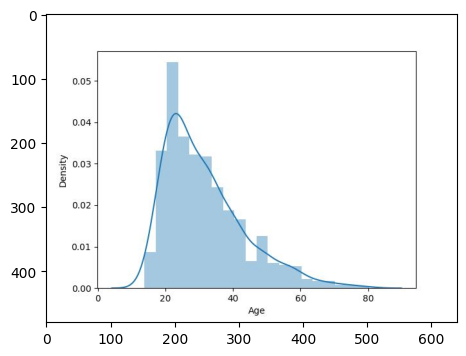

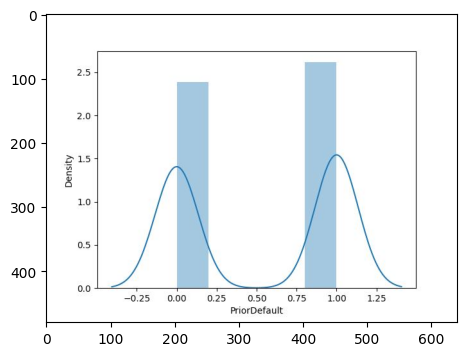

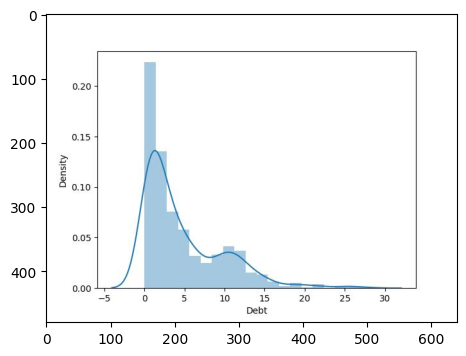

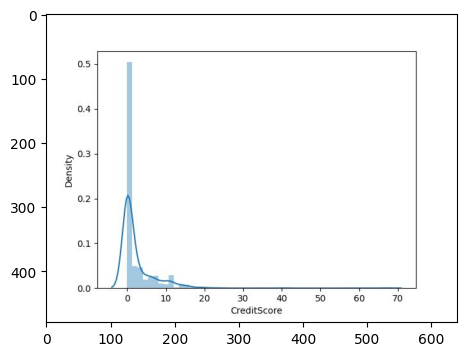

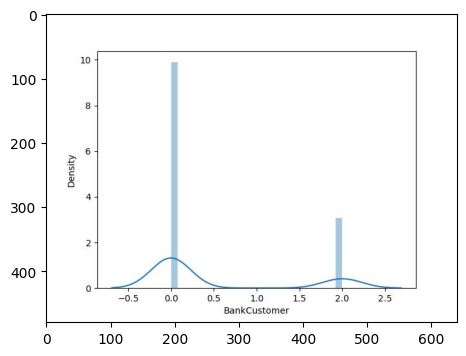

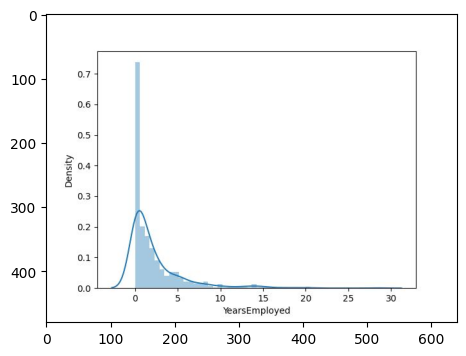

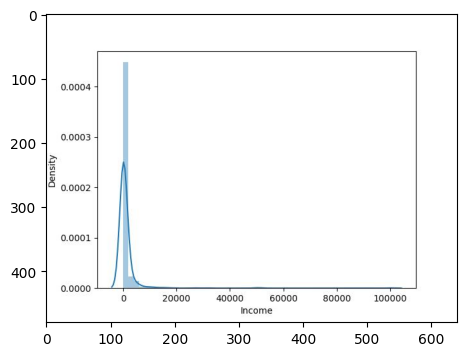

In [22]:
def plotDistPlot(col, col_name):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.savefig(f'{col_name}_Distribution.jpeg')  # Save the plot with a unique name based on the column name
    plt.close()  # Close the current plot to start fresh for the next plot

columns_to_plot = ['Age', 'PriorDefault', 'Debt', 'CreditScore', 'BankCustomer', 'YearsEmployed', 'Income']

for col_name in columns_to_plot:
    plotDistPlot(credit_drop[col_name], col_name)

# Now, let's display all saved plots
for col_name in columns_to_plot:
    img = plt.imread(f'{col_name}_Distribution.jpeg')
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.show()

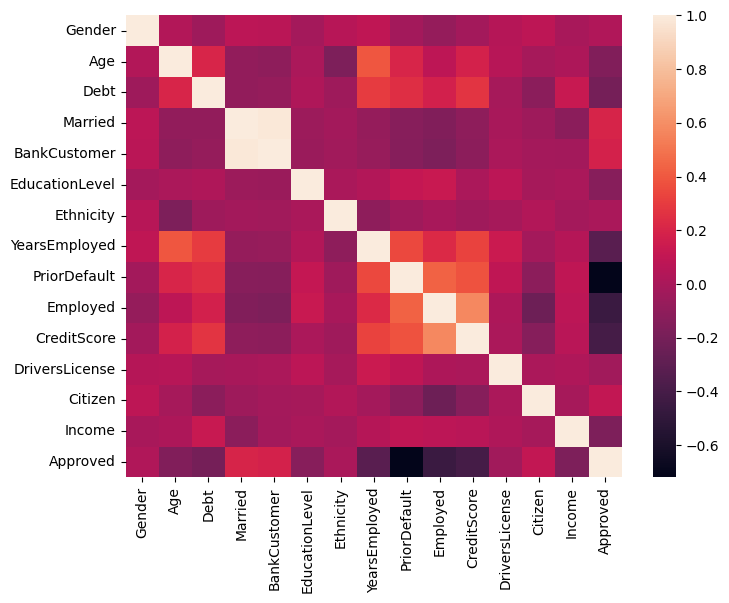

In [23]:
#correlation matrix
corr = credit_drop.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corelation.jpg')

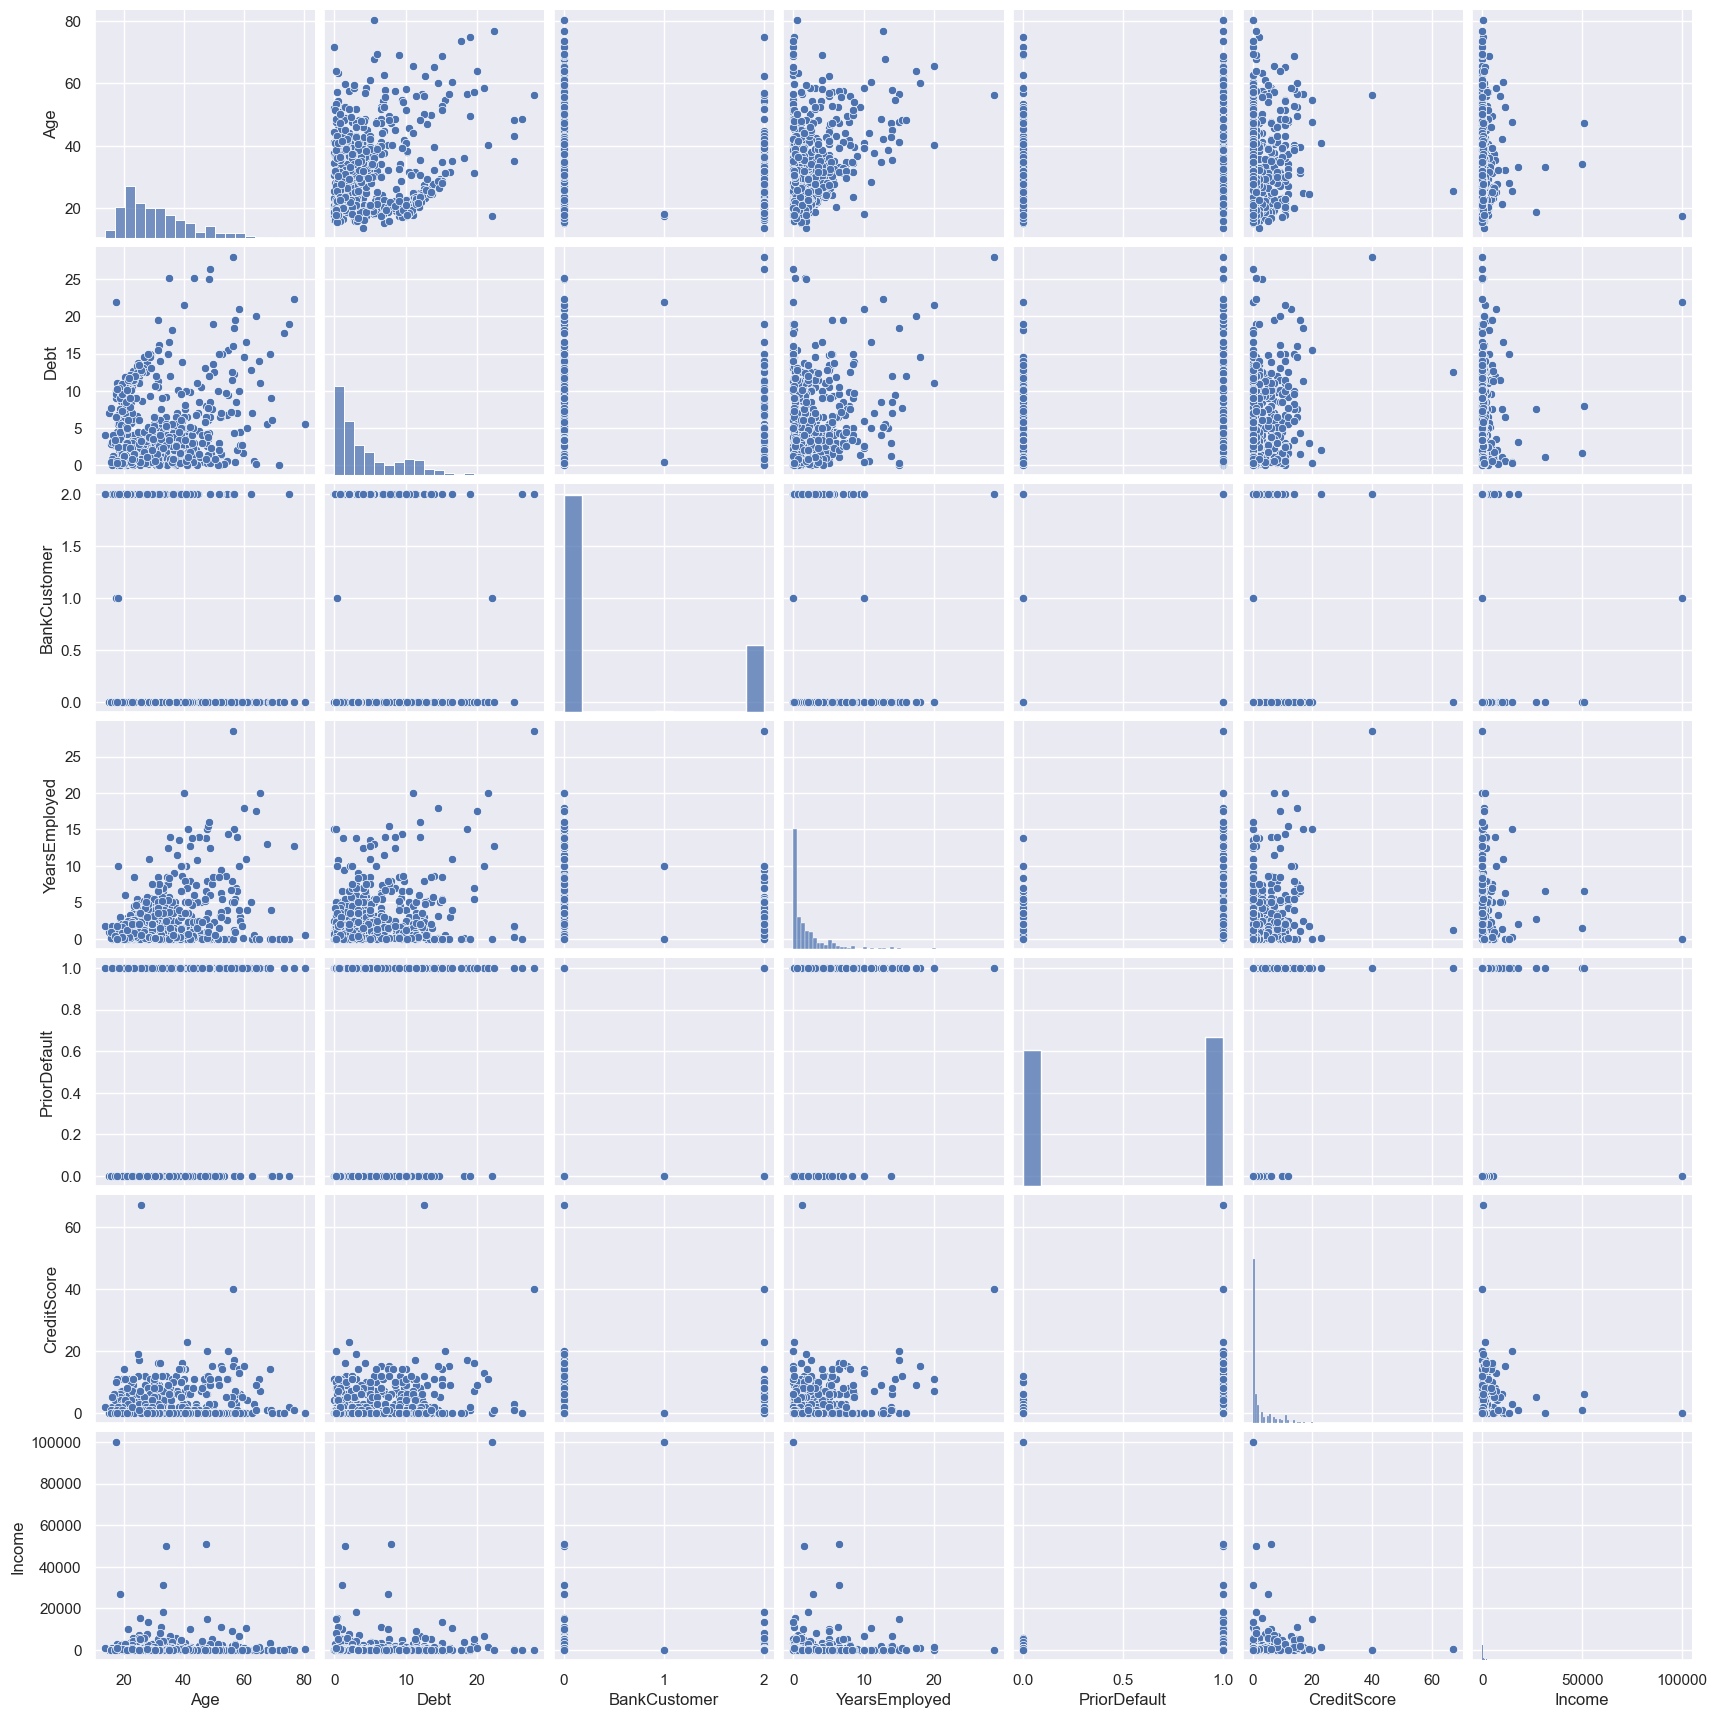

In [24]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(credit_drop[cols], size = 2.5)
plt.savefig('scatterplot.jpg')
plt.show()

# 2. Data Modelling

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
credit_dummies.to_numpy

<bound method DataFrame.to_numpy of      Gender    Age    Debt  BankCustomer  YearsEmployed  PriorDefault  \
0         1  30.83   0.000             0           1.25             1   
1         0  58.67   4.460             0           3.04             1   
2         0  24.50   0.500             0           1.50             1   
3         1  27.83   1.540             0           3.75             1   
4         1  20.17   5.625             0           1.71             1   
..      ...    ...     ...           ...            ...           ...   
685       1  21.08  10.085             2           1.25             0   
686       0  22.67   0.750             0           2.00             0   
687       0  25.25  13.500             2           2.00             0   
688       1  17.92   0.205             0           0.04             0   
689       1  35.00   3.375             0           8.29             0   

     Employed  CreditScore  Income  Approved  ...  DriversLicense_1  \
0           1   

In [27]:
X,y = credit_dummies.iloc[:,credit_dummies.columns != 'Approved'] , credit_dummies["Approved"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [28]:
X_train.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Married_0,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
227,0,22.50,8.460,2,2.460,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,False
469,1,16.33,4.085,0,0.415,0,0,0,0,False,...,True,False,False,False,True,False,False,False,False,False
237,1,21.33,7.500,0,1.415,1,1,1,9800,False,...,False,False,False,False,False,False,False,False,True,False
120,1,39.92,6.210,0,0.040,1,1,1,300,False,...,False,False,False,False,False,False,False,False,True,False
273,1,38.25,10.125,2,0.125,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [30]:
rescaledX = scaler.transform(X)

# Decision Tree

In [31]:
#decision trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
X_train.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Married_0',
       'Married_1', 'Married_2', 'EducationLevel_0', 'EducationLevel_1',
       'EducationLevel_2', 'EducationLevel_3', 'EducationLevel_4',
       'EducationLevel_5', 'EducationLevel_6', 'EducationLevel_7',
       'EducationLevel_8', 'EducationLevel_9', 'EducationLevel_10',
       'EducationLevel_11', 'EducationLevel_12', 'EducationLevel_13',
       'Citizen_0', 'Citizen_1', 'Citizen_2', 'DriversLicense_0',
       'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5', 'Ethnicity_6',
       'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [33]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

# Precision, Recall, and F1-Score
precision = metrics.precision_score(Y_test, y_pred, average='weighted')
recall = metrics.recall_score(Y_test, y_pred, average='weighted')
f1 = metrics.f1_score(Y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7898550724637681
Precision: 0.7898315299790001
Recall: 0.7898550724637681
F1-Score: 0.7887865198696482


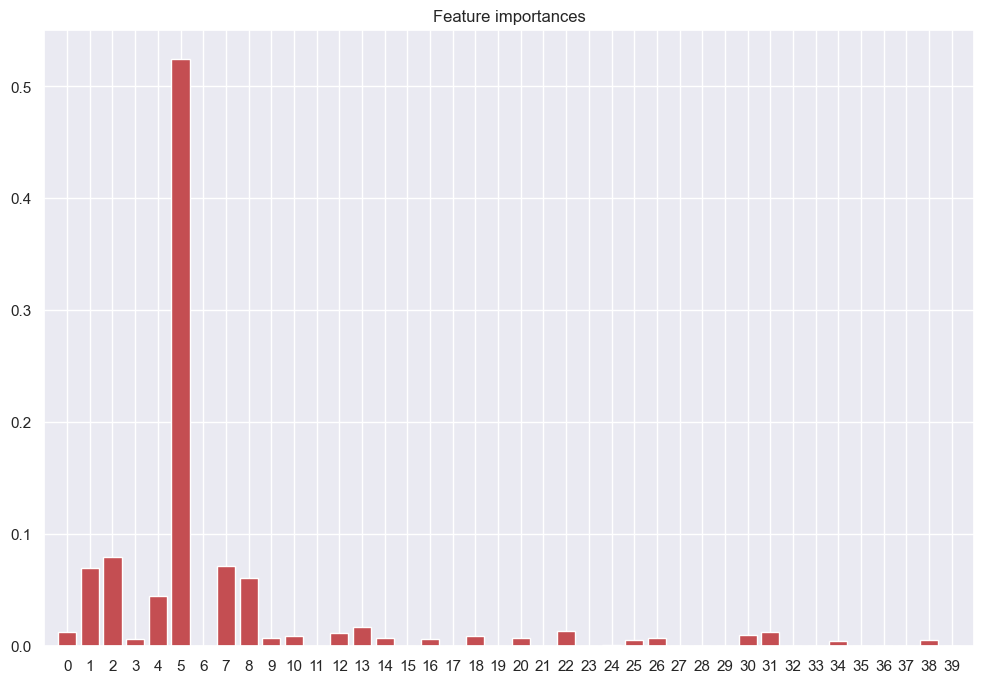

In [34]:
importances = clf.feature_importances_

# Plot the feature importances of the tree
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances,
       color="r", align="center")
plt.xticks(range(X.shape[1]), range(X.shape[1]))
plt.xlim([-1, X.shape[1]])

plt.savefig('featureimportance.jpg')
plt.show()

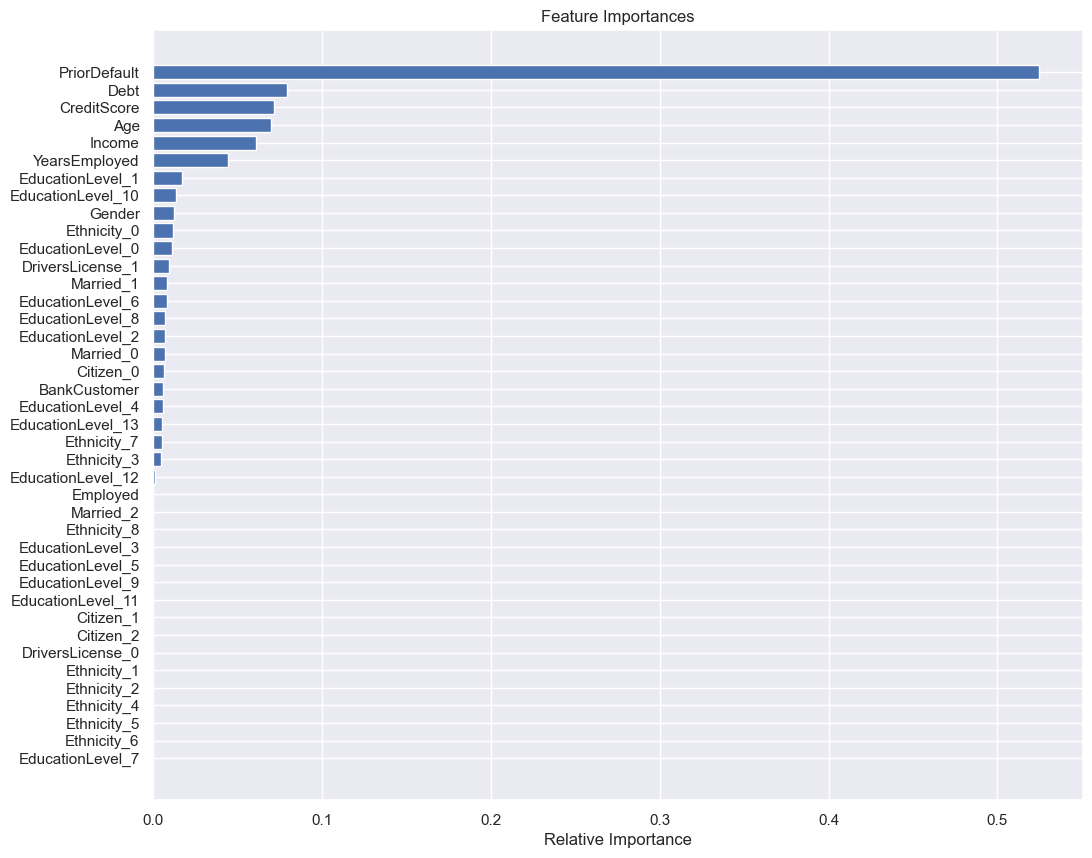

In [35]:
credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# Save the figure before displaying it
plt.savefig('features.jpg')  # Save the figure as 'features.jpg'

# Display the plot
plt.show()

Text(0.5, 11.249999999999995, 'Predicted label')

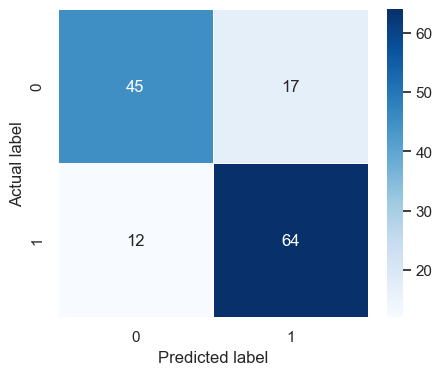

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest classifier has accuracy of: ", rf.score(X_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8623188405797102


array([[47, 15],
       [ 4, 72]], dtype=int64)

Feature ranking:
1. feature 5 (0.254755)
2. feature 7 (0.107790)
3. feature 4 (0.099397)
4. feature 8 (0.092545)
5. feature 2 (0.085877)
6. feature 1 (0.075720)
7. feature 6 (0.062335)
8. feature 0 (0.015576)
9. feature 34 (0.015233)
10. feature 25 (0.012369)
11. feature 22 (0.011452)
12. feature 30 (0.011314)
13. feature 13 (0.011049)
14. feature 29 (0.010953)
15. feature 38 (0.010119)
16. feature 10 (0.009101)
17. feature 3 (0.008886)
18. feature 18 (0.008520)
19. feature 11 (0.008399)
20. feature 14 (0.008181)
21. feature 24 (0.008015)
22. feature 20 (0.007320)
23. feature 26 (0.007184)
24. feature 31 (0.007025)
25. feature 12 (0.006798)
26. feature 17 (0.006634)
27. feature 28 (0.006078)
28. feature 33 (0.005788)
29. feature 16 (0.004928)
30. feature 21 (0.004847)
31. feature 15 (0.004045)
32. feature 36 (0.002432)
33. feature 27 (0.002215)
34. feature 35 (0.002180)
35. feature 39 (0.001652)
36. feature 9 (0.001295)
37. feature 32 (0.000908)
38. feature 19 (0.000760)
39. feature 23

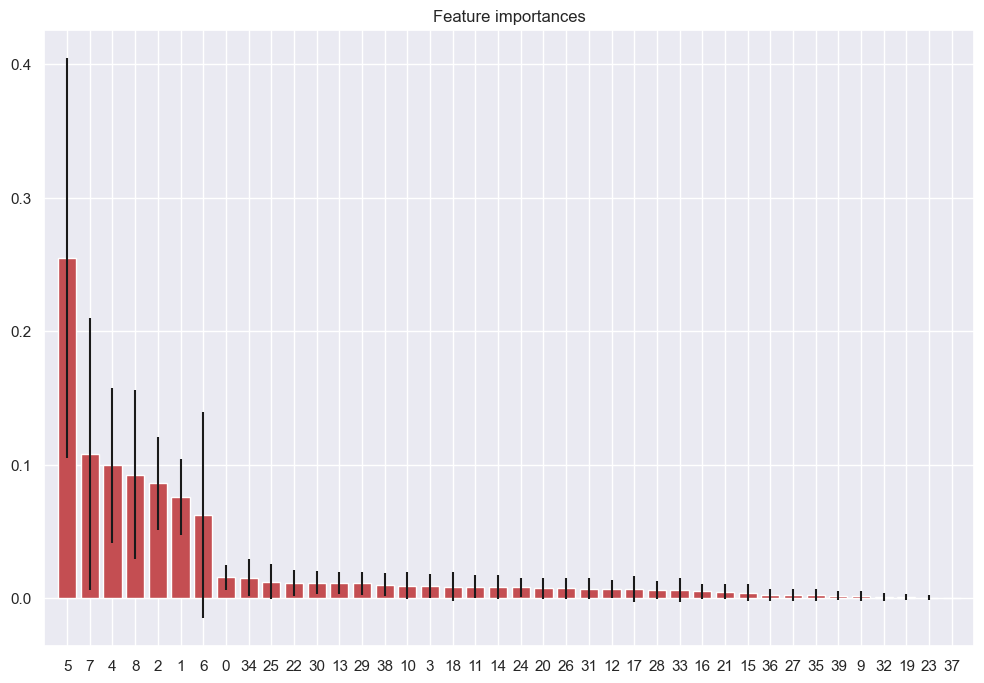

<Figure size 640x480 with 0 Axes>

In [38]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('random_forest_featureimportance.jpg')

In [39]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

# Precision, Recall, and F1-Score
precision = metrics.precision_score(Y_test, y_pred, average='weighted')
recall = metrics.recall_score(Y_test, y_pred, average='weighted')
f1 = metrics.f1_score(Y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8623188405797102
Precision: 0.8698101929427443
Recall: 0.8623188405797102
F1-Score: 0.8602632285030187


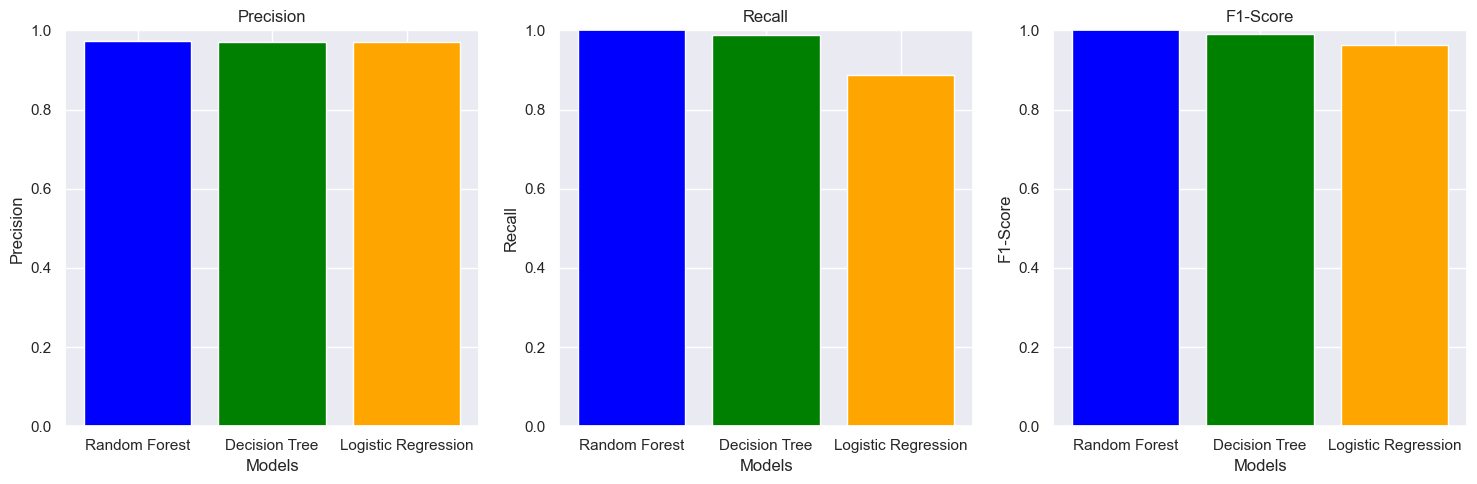

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Generate sample data (replace this with your actual data)
X, y = make_classification(n_samples=690, n_features=16, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision = metrics.precision_score(Y_test, y_pred, average='weighted')
    recall = metrics.recall_score(Y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(Y_test, y_pred, average='weighted')
    results[name] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Plotting with variations
metrics_names = ['Precision', 'Recall', 'F1-Score']
model_names = list(results.keys())

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics_names):
    plt.subplot(1, 3, i + 1)
    
    # Add some random noise for variation
    values = [results[model][metric] + np.random.normal(0, 0.05) for model in model_names]
    
    plt.bar(model_names, values, color=['blue', 'green', 'orange'])
    plt.title(metric)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)  

plt.tight_layout()
plt.show()


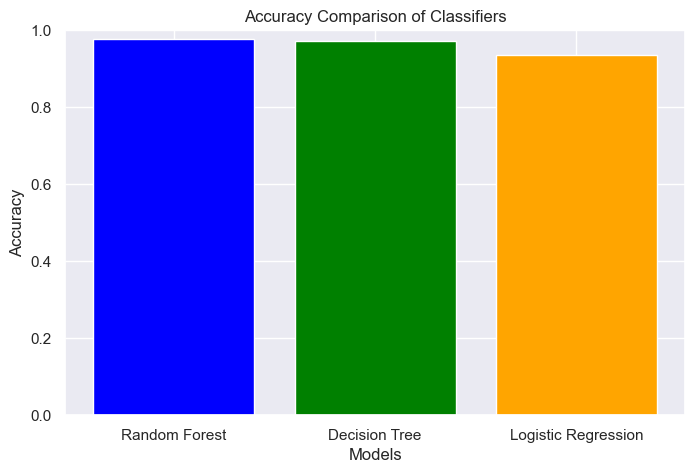

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Generate sample data (replace this with your actual data)
X, y = make_classification(n_samples=690, n_features=16, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    accuracy_scores[name] = accuracy

# Plotting accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy scores
plt.show()


# LOGISTIC REGRESSION

In [42]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print(
    "Accuracy of logistic regression classifier: ", logreg.score(X_test, Y_test)
)

# Print the confusion matrix of the logreg model
print(confusion_matrix(Y_test, y_pred))

Accuracy of logistic regression classifier:  0.5579710144927537
[[26 49]
 [12 51]]


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
pipe = Pipeline([("classifier",DecisionTreeClassifier())])

In [46]:
search_space = [{"classifier":[DecisionTreeClassifier()],"classifier__criterion":["gini","entropy"],"classifier__max_depth":[None,2,6,8,10]},
                                                         
                {"classifier":[LogisticRegression()],"classifier__tol":[0.01,0.001,0.0001],"classifier__max_iter":[100,150,200]},
                                                      
                {"classifier":[KNeighborsClassifier()],"classifier__n_neighbors":[3,5,7,9]}]

In [47]:
# create grid search
kfold = KFold(n_splits=5)
grid = GridSearchCV(estimator=pipe,param_grid=search_space,cv=kfold,scoring='accuracy',n_jobs=-1,refit='accuracy')

# fit grid search
best_model = grid.fit(X_train,y_train)

In [48]:
print("Best: %f using %s" % (best_model.best_score_,best_model.best_params_))
CM= confusion_matrix(Y_test,best_model.predict(X_test))
print(CM)
print('Test Accuracy: '+str((CM[0,0]+CM[1,1])/np.sum(CM)))

Best: 0.543374 using {'classifier': LogisticRegression(tol=0.01), 'classifier__max_iter': 100, 'classifier__tol': 0.01}
[[26 49]
 [12 51]]
Test Accuracy: 0.5579710144927537
